In [1]:
%%capture
%run final_chars_classification.ipynb



In [2]:
%run table_detector.ipynb

In [3]:
%run final_functions.ipynb

In [4]:
%run preprocessing.ipynb

In [5]:
%run get_rows_number.ipynb

./all_symbols/ 0
./all_symbols/( 70
./all_symbols/) 84
./all_symbols/+ 67
./all_symbols/A 78
./all_symbols/B 67
./all_symbols/C 79
./all_symbols/D 72
./all_symbols/E 74
./all_symbols/F 80
./all_symbols/implies 72
./all_symbols/xor 86
./all_symbols/~ 69


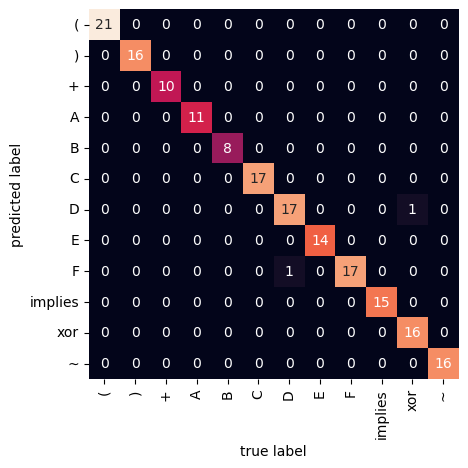

./0_1_symbols/ 0
./0_1_symbols/0 27
./0_1_symbols/1 27


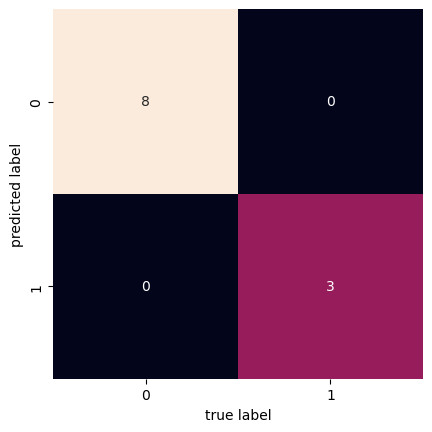

./letters_only_symbols/ 0
./letters_only_symbols/A 78
./letters_only_symbols/B 67
./letters_only_symbols/C 79
./letters_only_symbols/D 72
./letters_only_symbols/E 74
./letters_only_symbols/F 80


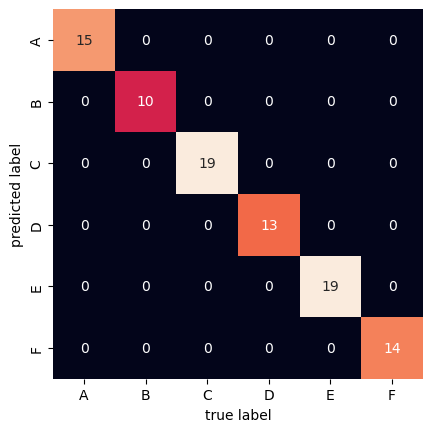

./E_F_symbols/ 0
./E_F_symbols/E 74
./E_F_symbols/F 80


c:\Users\77\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


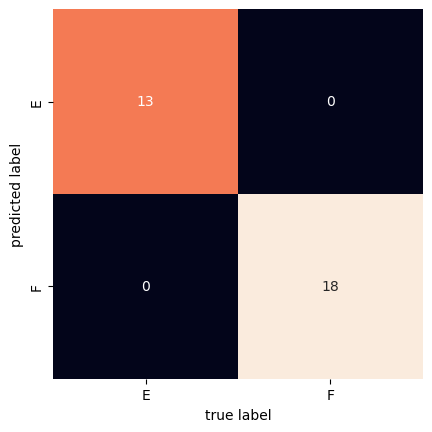

In [6]:
# initialize_models(True)
load_models()

In [7]:
from tabular import tabular
import math



Solution: F0 = ABC


Solution: F1 = C + B + A


In [8]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img) 
        
        img = table_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        cells, col_num, row_num = box_extraction(img, False)#, table= True)

        letters = [classify(i, is_letter=True, is_table=is_table) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True, is_table=is_table) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        
        if showTrace:
            print(letters)
            print(numbers)
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        num_outputs = col_num-int(math.log(row_num-1,2))
        print(num_outputs)
        solver.solve(cells=numbers, num_col=col_num, num_outputs=num_outputs)

    else: 

        img = expression_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        result = [get_table(expression) for expression in expressions]
        for r in result:
            print(r)

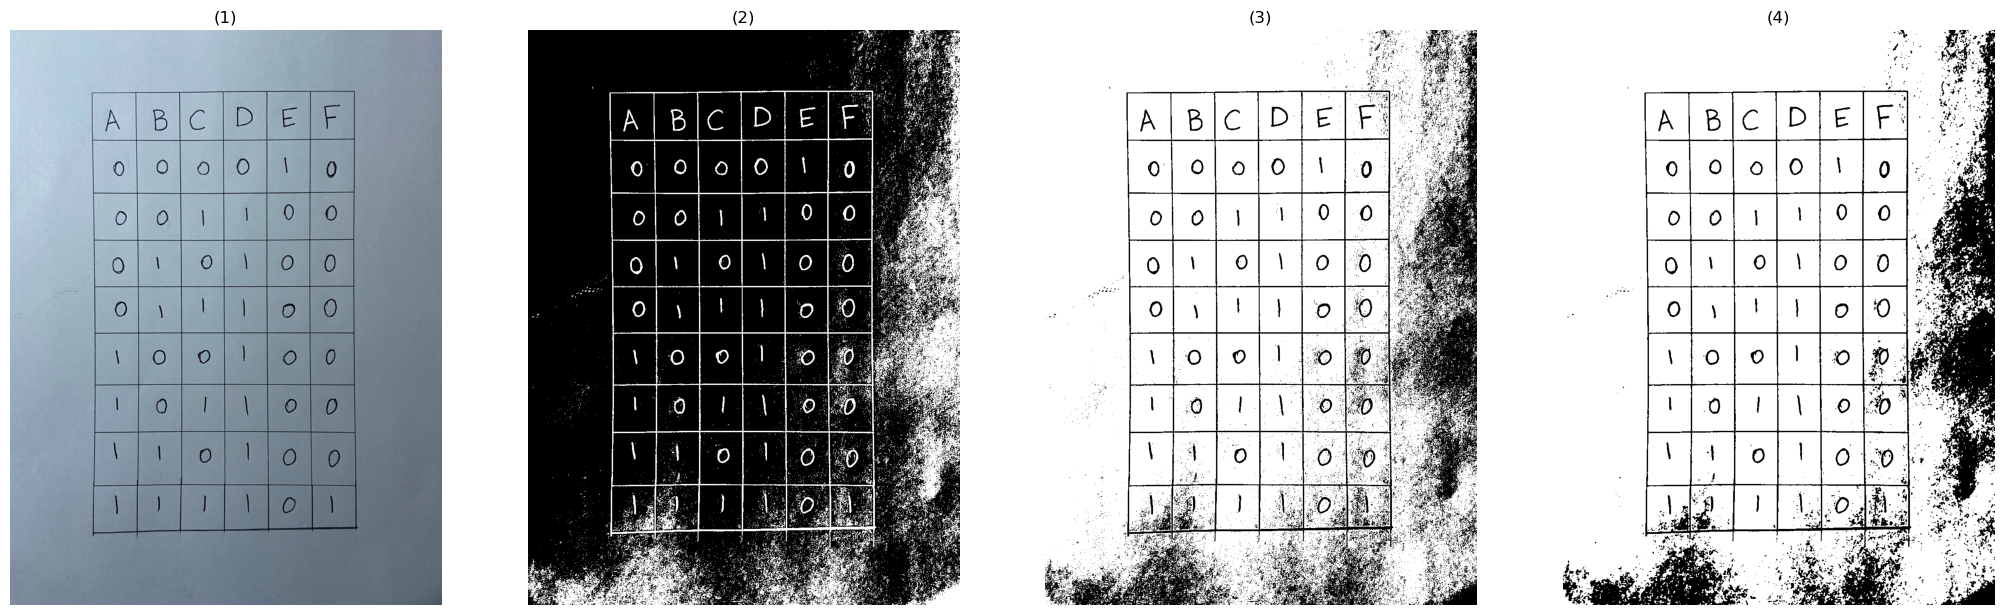

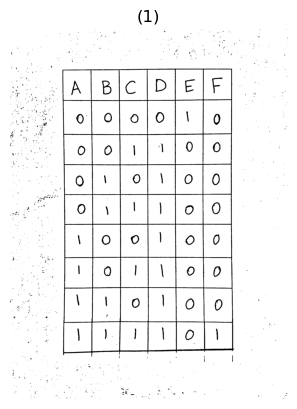

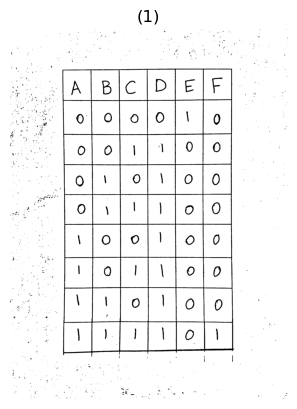

54
6 9
[array(['A'], dtype='<U1'), array(['B'], dtype='<U1'), array(['C'], dtype='<U1'), array(['D'], dtype='<U1'), array(['E'], dtype='<U1'), array(['E'], dtype='<U1')]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]
cols numbers 6
3


Solution: F0 = C + B + A


Solution: F1 = A'


Solution: F2 = ABC


In [10]:
image = cv2.imread("./test_images/t29.jpg")

result = solve_expression(image, is_table=True, showTrace=True)


